# Exploratory Data Analysis (EDA) - Learning Styles Classification

This notebook performs comprehensive exploratory data analysis on the student learning styles dataset.

## Dataset Overview
- **Primary Dataset**: Student learning styles and demographic information
- **Secondary Dataset**: Time spent on learning materials by type
- **Target**: Multi-label classification of learning styles (Active/Reflective, Visual/Verbal)

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import joblib
from output_paths import get_data_output_path, get_model_output_path, get_report_output_path, get_plot_output_path
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Library versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

Library versions:
pandas: 2.3.3
numpy: 2.0.2
matplotlib: 3.9.4
seaborn: 0.13.2


## 1. Data Loading and Initial Inspection

In [27]:
# Load primary dataset - student learning styles
data_path_styles = "dataset/dfjadi-simplified - dfjadi-simplified.csv"
df_styles = pd.read_csv(data_path_styles)

print("Dataset Shape:", df_styles.shape)
print("\nColumn Names:")
print(df_styles.columns.tolist())
print("\nFirst 5 rows:")
display(df_styles.head())

Dataset Shape: (604, 12)

Column Names:
['NIM', 'Nama', 'Jenis Kelamin', 'Prodi', 'Skor 1', 'Skor 2', 'Skor 3', 'Skor 4', 'Pemrosesan', 'Persepsi', 'Input', 'Pemahaman']

First 5 rows:


,NIM,Nama,Jenis Kelamin,Prodi,Skor 1,Skor 2,Skor 3,Skor 4,Pemrosesan,Persepsi,Input,Pemahaman
0,22SA11A074,Mohamad Ridho Mubarok,Laki-laki,Informatika,-1,1,-3,-3,Reflektif Rendah,Sensing Rendah,Verbal Rendah,Global Rendah
1,22SA11A134,Maria Angelina Cahyani Candrakasih,Perempuan,Informatika,1,-3,-5,1,Aktif Rendah,Intuitif Rendah,Verbal Sedang,Sequential Rendah
2,22SA31A027,Tresnanda Agsifa Cakra Buana,Laki-laki,Teknologi Informasi,-5,5,1,1,Reflektif Sedang,Sensing Sedang,Visual Rendah,Sequential Rendah
3,22sa11a038,Ndaru Febrian Pujo Leksono,Laki-laki,Informatika,-1,1,-7,-3,Reflektif Rendah,Sensing Rendah,Verbal Sedang,Global Rendah
4,22SA11A035,Nurul Khotimah Ansyari,Perempuan,Informatika,-5,-1,-5,3,Reflektif Sedang,Intuitif Rendah,Verbal Sedang,Sequential Rendah


In [28]:
# Load secondary dataset - time spent on materials
data_path_time = "dataset/mhs_grouping_by_material_type.csv"
df_time = pd.read_csv(data_path_time)

print("Time Dataset Shape:", df_time.shape)
print("\nColumn Names:")
print(df_time.columns.tolist())
print("\nFirst 5 rows:")
display(df_time.head())

Time Dataset Shape: (456, 8)

Column Names:
['NPM', 'NAMA', 'time_materials_video', 'time_materials_document', 'time_materials_article', 'time_tasks', 'time_forums', 'time_quizzes']

First 5 rows:


,NPM,NAMA,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
0,MHS001,Mahasiswa Pertama,0,0,0,0,0,0
1,21SA1090,Bobit,0,0,0,0,5,0
2,MHSIF001,Mahasiswa IF 1,0,1100,18536,1009,2959,0
3,MHSIF002,Mahasiswa IF 2,0,0,0,0,0,0
4,MHSIF003,Mahasiswa IF 3,0,0,0,0,0,0


## 2. Data Quality Assessment

In [29]:
# Check for missing values in learning styles dataset
print("Missing Values in Learning Styles Dataset:")
missing_styles = df_styles.isnull().sum()
missing_percentage = (missing_styles / len(df_styles)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_styles,
    'Missing Percentage': missing_percentage
})
display(missing_df[missing_df['Missing Count'] > 0])

Missing Values in Learning Styles Dataset:


,Missing Count,Missing Percentage


In [30]:
# Check for missing values in time dataset
print("Missing Values in Time Dataset:")
missing_time = df_time.isnull().sum()
missing_percentage_time = (missing_time / len(df_time)) * 100
missing_time_df = pd.DataFrame({
    'Missing Count': missing_time,
    'Missing Percentage': missing_percentage_time
})
display(missing_time_df[missing_time_df['Missing Count'] > 0])

Missing Values in Time Dataset:


,Missing Count,Missing Percentage


In [31]:
# Data types and basic statistics
print("Learning Styles Dataset Info:")
df_styles.info()

print("\n" + "="*50)
print("Time Dataset Info:")
df_time.info()

Learning Styles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NIM            604 non-null    object
 1   Nama           604 non-null    object
 2   Jenis Kelamin  604 non-null    object
 3   Prodi          604 non-null    object
 4   Skor 1         604 non-null    int64 
 5   Skor 2         604 non-null    int64 
 6   Skor 3         604 non-null    int64 
 7   Skor 4         604 non-null    int64 
 8   Pemrosesan     604 non-null    object
 9   Persepsi       604 non-null    object
 10  Input          604 non-null    object
 11  Pemahaman      604 non-null    object
dtypes: int64(4), object(8)
memory usage: 56.8+ KB

Time Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   -----

## 3. Student Demographics Analysis

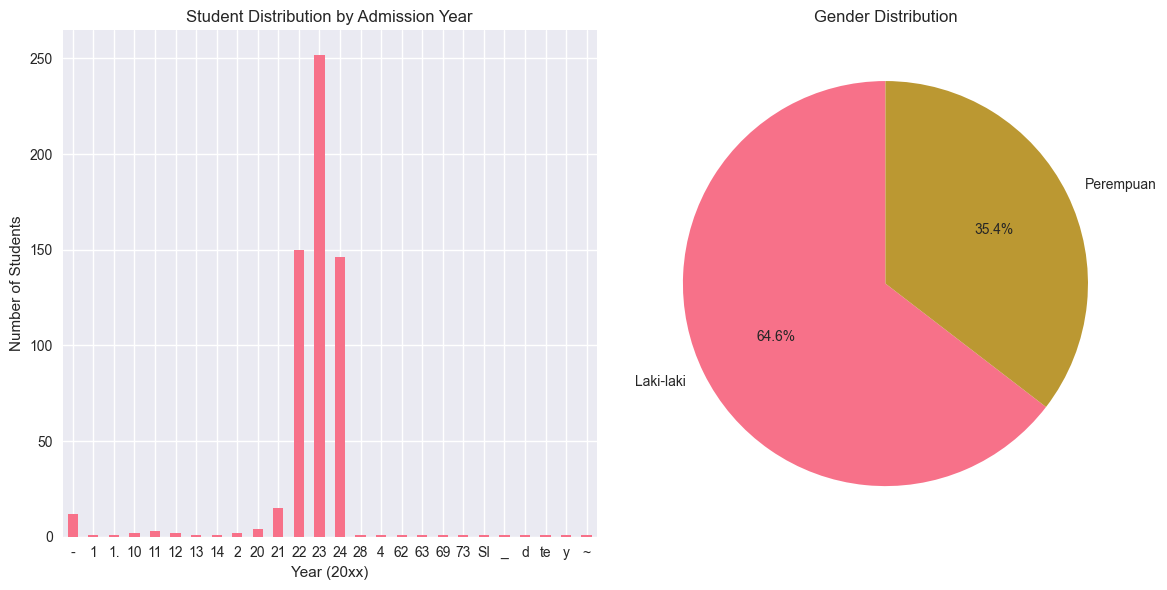

Year-wise Distribution:
20-: 12 students
201: 1 students
201.: 1 students
2010: 2 students
2011: 3 students
2012: 2 students
2013: 1 students
2014: 1 students
202: 2 students
2020: 4 students
2021: 15 students
2022: 150 students
2023: 252 students
2024: 146 students
2028: 1 students
204: 1 students
2062: 1 students
2063: 1 students
2069: 1 students
2073: 1 students
20SI: 1 students
20_: 1 students
20d: 1 students
20te: 1 students
20y: 1 students
20~: 1 students

Gender Distribution:
Laki-laki: 390 students (64.6%)
Perempuan: 214 students (35.4%)


In [32]:
# Analyze student distribution by admission year
df_styles['Year'] = df_styles['NIM'].astype(str).str[:2]
year_distribution = df_styles['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
year_distribution.plot(kind='bar')
plt.title('Student Distribution by Admission Year')
plt.xlabel('Year (20xx)')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

# Gender distribution
plt.subplot(1, 2, 2)
gender_dist = df_styles['Jenis Kelamin'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.tight_layout()
plt.savefig(get_plot_output_path('demographics_overview.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Year-wise Distribution:")
for year, count in year_distribution.items():
    print(f"20{year}: {count} students")

print("\nGender Distribution:")
for gender, count in gender_dist.items():
    print(f"{gender}: {count} students ({count/len(df_styles)*100:.1f}%)")

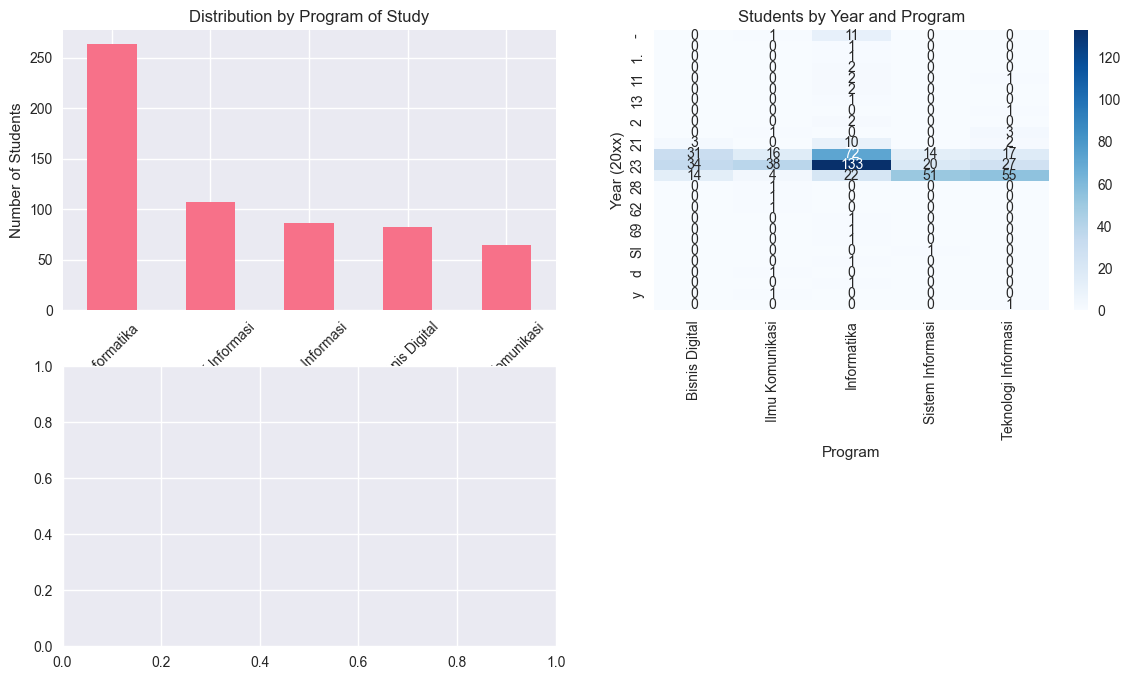

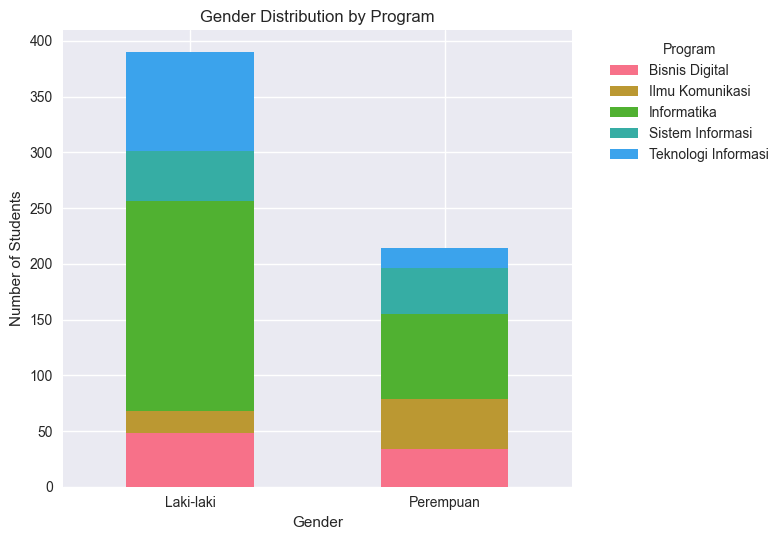

In [33]:
# Program of Study analysis
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
prodi_dist = df_styles['Prodi'].value_counts()
prodi_dist.plot(kind='bar')
plt.title('Distribution by Program of Study')
plt.xlabel('Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# Year vs Program crosstab
plt.subplot(2, 2, 2)
year_prodi_crosstab = pd.crosstab(df_styles['Year'], df_styles['Prodi'])
sns.heatmap(year_prodi_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Students by Year and Program')
plt.xlabel('Program')
plt.ylabel('Year (20xx)')

# Gender vs Program
plt.subplot(2, 2, 3)
gender_prodi_crosstab = pd.crosstab(df_styles['Jenis Kelamin'], df_styles['Prodi'])
gender_prodi_crosstab.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Program')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(get_plot_output_path('demographics_detailed.png'), dpi=300, bbox_inches='tight')
plt.show()

## 4. Learning Styles Analysis

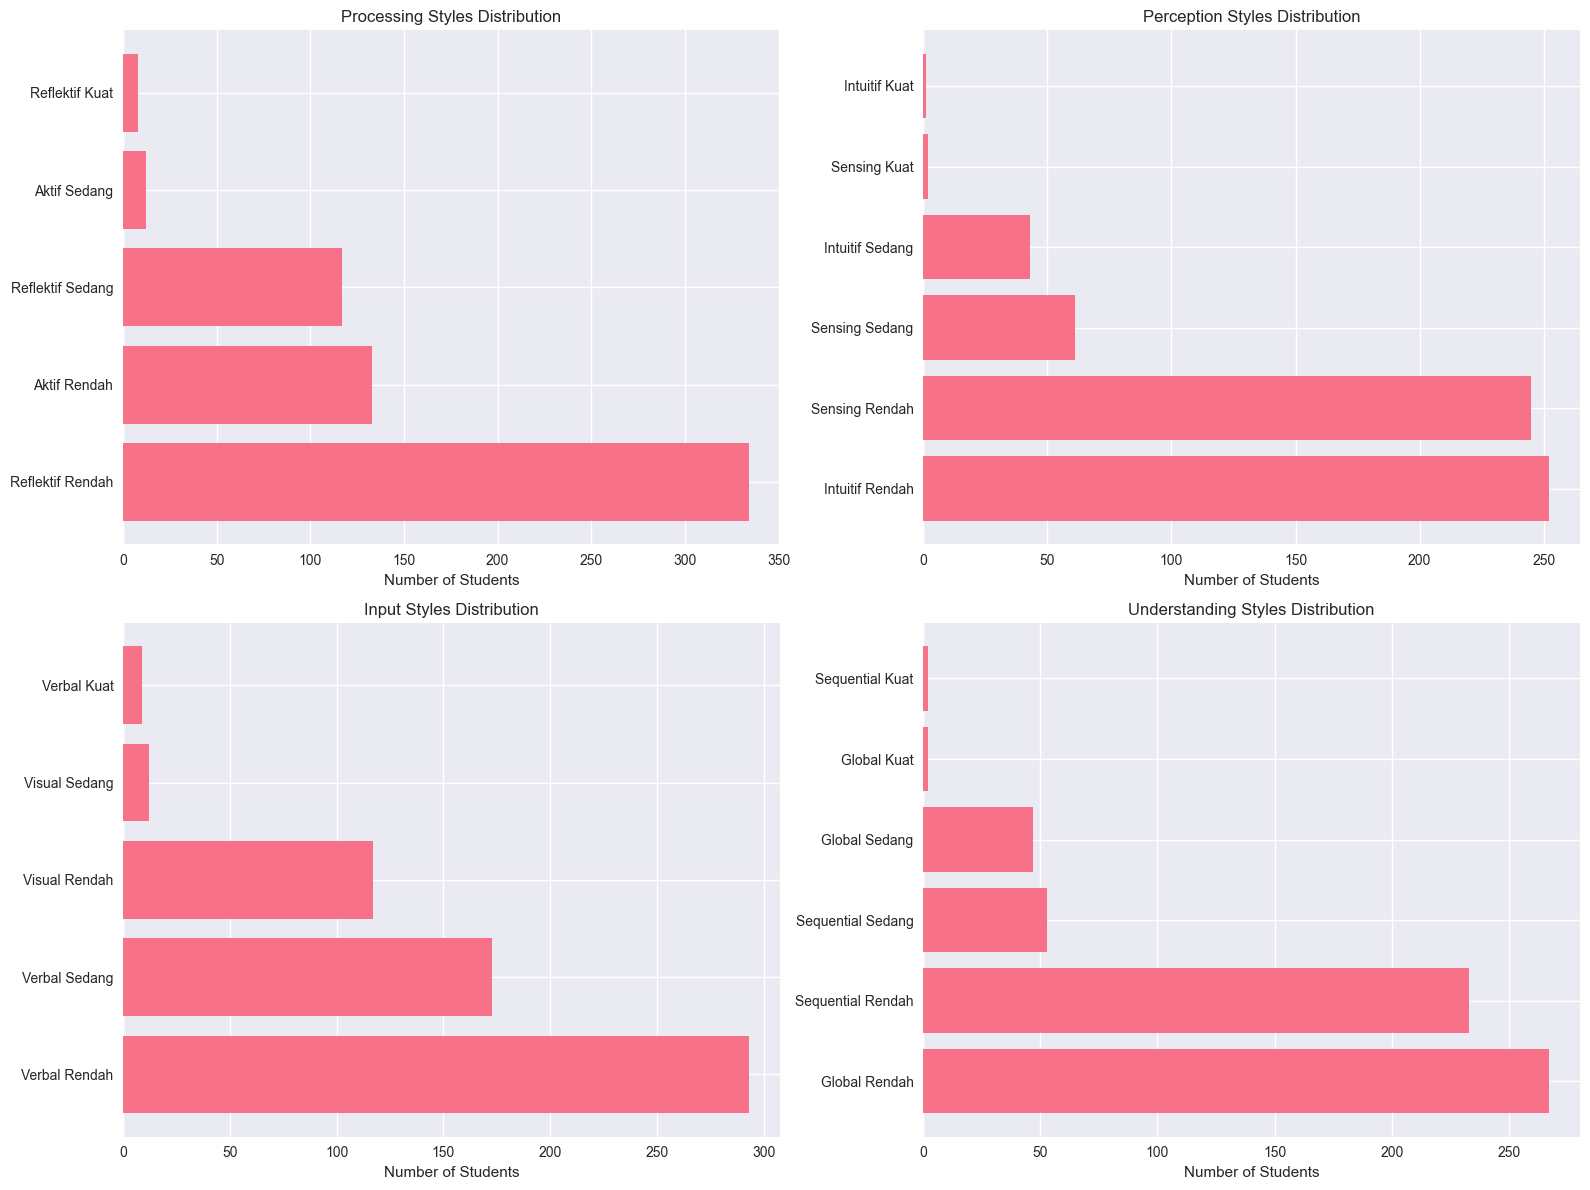

Learning Style Distributions:

Processing Styles:
  Reflektif Rendah: 334 (55.3%)
  Aktif Rendah: 133 (22.0%)
  Reflektif Sedang: 117 (19.4%)
  Aktif Sedang: 12 (2.0%)
  Reflektif Kuat: 8 (1.3%)


In [34]:
# Analyze original learning style distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Processing styles
processing_counts = df_styles['Pemrosesan'].value_counts()
axes[0, 0].barh(range(len(processing_counts)), processing_counts.values)
axes[0, 0].set_yticks(range(len(processing_counts)))
axes[0, 0].set_yticklabels(processing_counts.index)
axes[0, 0].set_title('Processing Styles Distribution')
axes[0, 0].set_xlabel('Number of Students')

# Perception styles
perception_counts = df_styles['Persepsi'].value_counts()
axes[0, 1].barh(range(len(perception_counts)), perception_counts.values)
axes[0, 1].set_yticks(range(len(perception_counts)))
axes[0, 1].set_yticklabels(perception_counts.index)
axes[0, 1].set_title('Perception Styles Distribution')
axes[0, 1].set_xlabel('Number of Students')

# Input styles
input_counts = df_styles['Input'].value_counts()
axes[1, 0].barh(range(len(input_counts)), input_counts.values)
axes[1, 0].set_yticks(range(len(input_counts)))
axes[1, 0].set_yticklabels(input_counts.index)
axes[1, 0].set_title('Input Styles Distribution')
axes[1, 0].set_xlabel('Number of Students')

# Understanding styles
understanding_counts = df_styles['Pemahaman'].value_counts()
axes[1, 1].barh(range(len(understanding_counts)), understanding_counts.values)
axes[1, 1].set_yticks(range(len(understanding_counts)))
axes[1, 1].set_yticklabels(understanding_counts.index)
axes[1, 1].set_title('Understanding Styles Distribution')
axes[1, 1].set_xlabel('Number of Students')

plt.tight_layout()
plt.savefig(get_plot_output_path('learning_styles_original.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Learning Style Distributions:")
print("\nProcessing Styles:")
for style, count in processing_counts.items():
    print(f"  {style}: {count} ({count/len(df_styles)*100:.1f}%)")

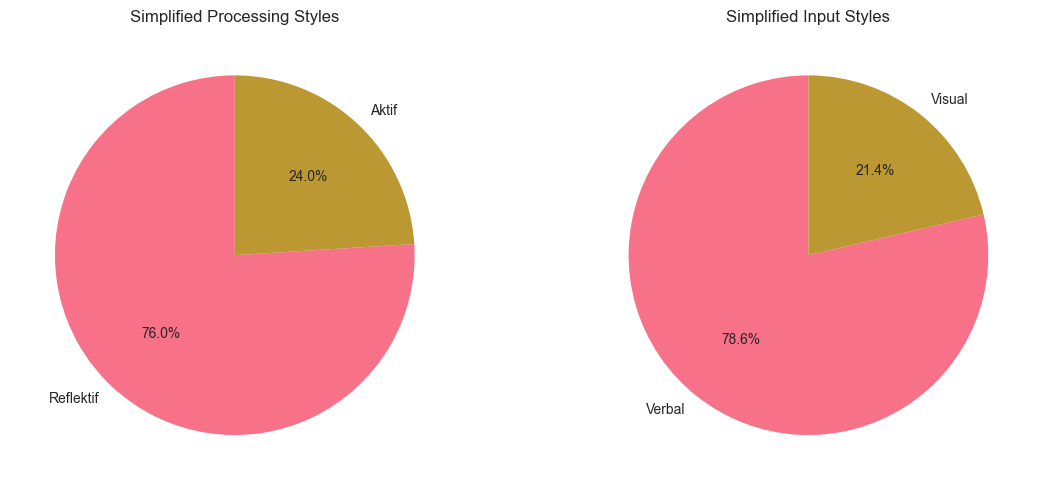

Simplified Learning Style Distributions:

Processing (Simplified):
  Reflektif: 459 (76.0%)
  Aktif: 145 (24.0%)

Input (Simplified):
  Verbal: 475 (78.6%)
  Visual: 129 (21.4%)


In [35]:
# Create simplified binary classifications
def map_pemrosesan(row):
    if any(x in str(row['Pemrosesan']) for x in ['Reflektif']):
        return 'Reflektif'
    elif any(x in str(row['Pemrosesan']) for x in ['Aktif']):
        return 'Aktif'
    else:
        return 'Unknown'

def map_input(row):
    if any(x in str(row['Input']) for x in ['Visual']):
        return 'Visual'
    elif any(x in str(row['Input']) for x in ['Verbal']):
        return 'Verbal'
    else:
        return 'Unknown'

df_styles['Pemrosesan_Simplified'] = df_styles.apply(map_pemrosesan, axis=1)
df_styles['Input_Simplified'] = df_styles.apply(map_input, axis=1)

# Visualize simplified classifications
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Simplified Processing
processing_simp = df_styles['Pemrosesan_Simplified'].value_counts()
axes[0].pie(processing_simp.values, labels=processing_simp.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Simplified Processing Styles')

# Simplified Input
input_simp = df_styles['Input_Simplified'].value_counts()
axes[1].pie(input_simp.values, labels=input_simp.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Simplified Input Styles')

plt.tight_layout()
plt.savefig(get_plot_output_path('learning_styles_simplified.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Simplified Learning Style Distributions:")
print("\nProcessing (Simplified):")
for style, count in processing_simp.items():
    print(f"  {style}: {count} ({count/len(df_styles)*100:.1f}%)")

print("\nInput (Simplified):")
for style, count in input_simp.items():
    print(f"  {style}: {count} ({count/len(df_styles)*100:.1f}%)")

## 5. Time Spent on Materials Analysis

In [36]:
# Analyze time spent on different material types
time_columns = ['time_materials_video', 'time_materials_document', 'time_materials_article', 
               'time_tasks', 'time_forums', 'time_quizzes']

# Filter only available columns
available_time_columns = [col for col in time_columns if col in df_time.columns]

print("Time Spent Statistics (in seconds):")
time_stats = df_time[available_time_columns].describe()
display(time_stats)

# Convert to minutes for better interpretation
time_minutes = df_time[available_time_columns] / 60
print("\nTime Spent Statistics (in minutes):")
display(time_minutes.describe())

Time Spent Statistics (in seconds):


,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.0
mean,1149.096491,6795.366228,2772.094298,173.243421,22.175439,0.0
std,5024.538264,26400.012166,10020.602713,920.921497,160.578446,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5.000000,3994.500000,0.000000,0.000000,0.000000,0.0
max,62535.000000,381564.000000,81531.000000,9021.000000,2959.000000,0.0



Time Spent Statistics (in minutes):


,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.0
mean,19.151608,113.256104,46.201572,2.887390,0.369591,0.0
std,83.742304,440.000203,167.010045,15.348692,2.676307,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.083333,66.575000,0.000000,0.000000,0.000000,0.0
max,1042.250000,6359.400000,1358.850000,150.350000,49.316667,0.0


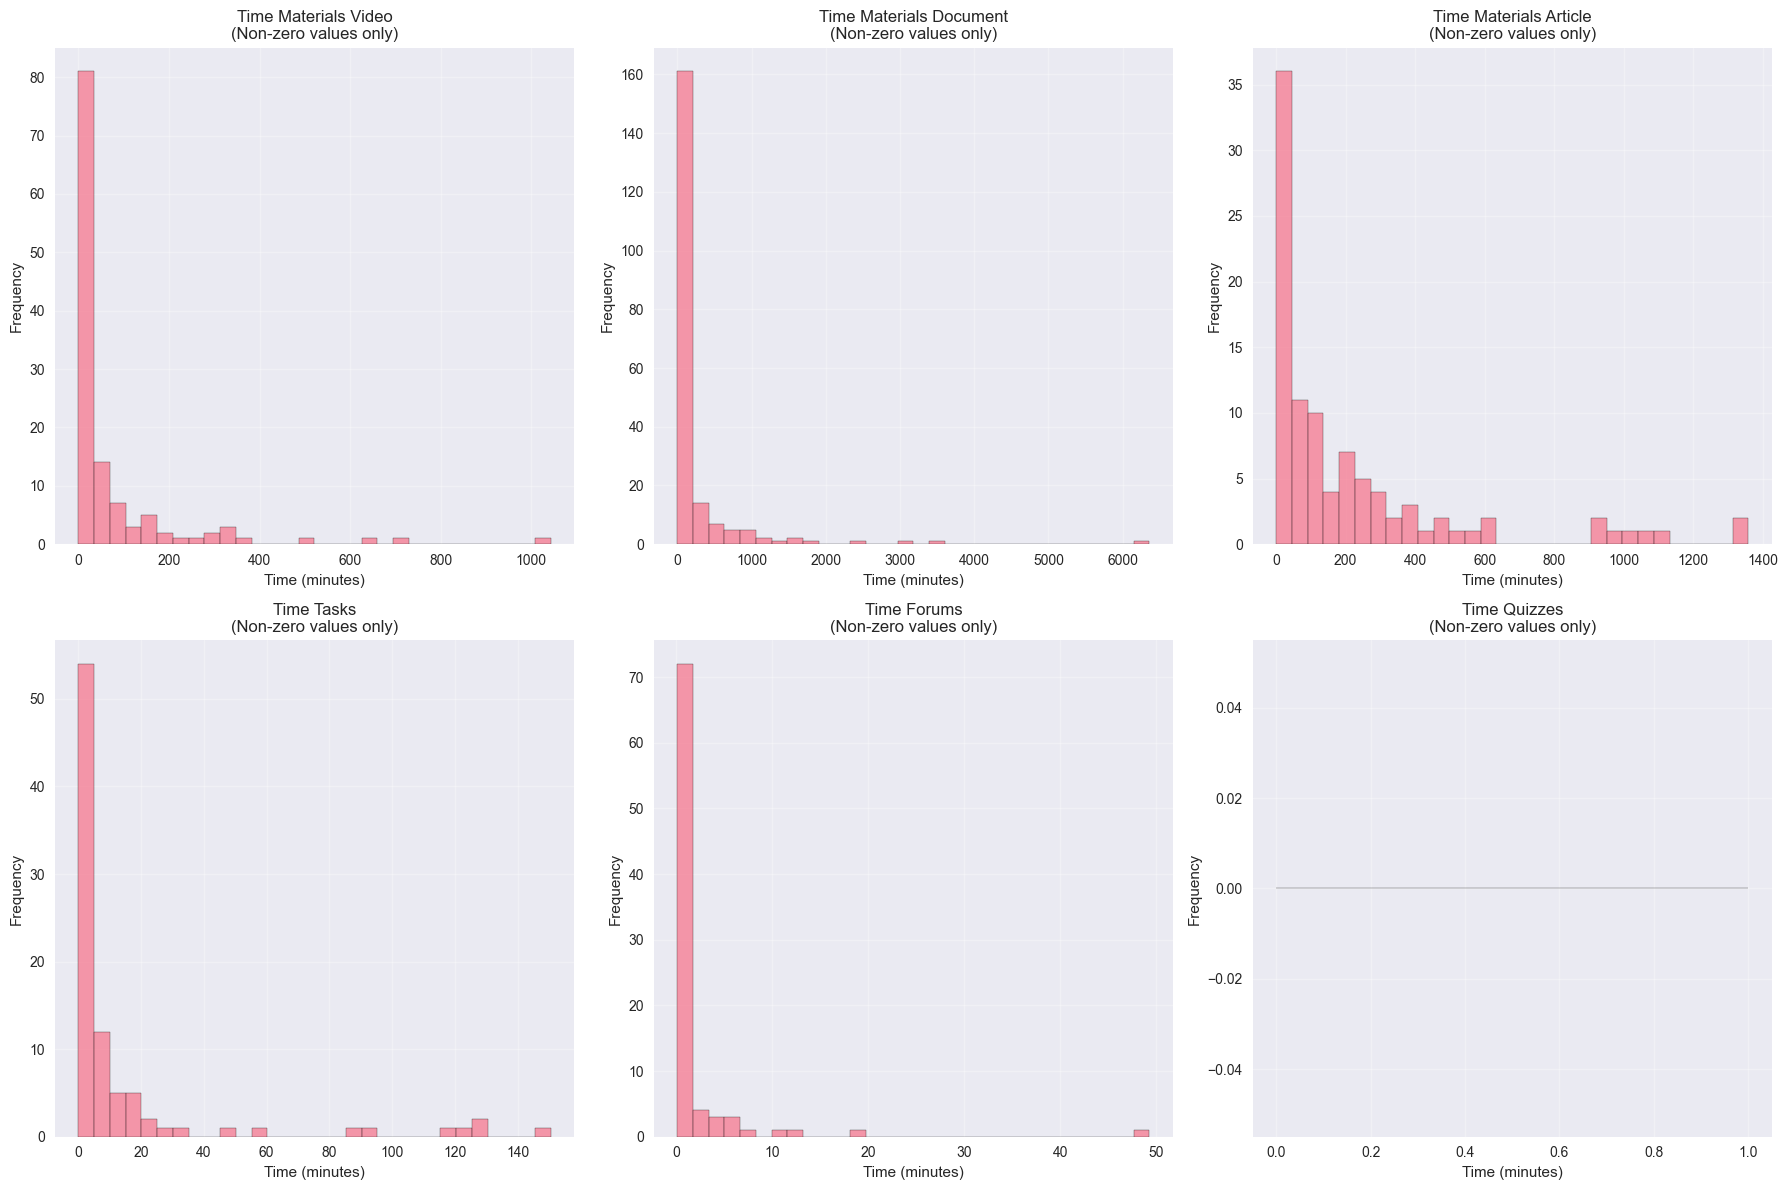

In [37]:
# Visualize time distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, column in enumerate(available_time_columns[:6]):
    # Remove zeros for better visualization
    nonzero_data = df_time[df_time[column] > 0][column] / 60  # Convert to minutes
    
    axes[i].hist(nonzero_data, bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{column.replace("_", " ").title()}\n(Non-zero values only)')
    axes[i].set_xlabel('Time (minutes)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(get_plot_output_path('time_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()

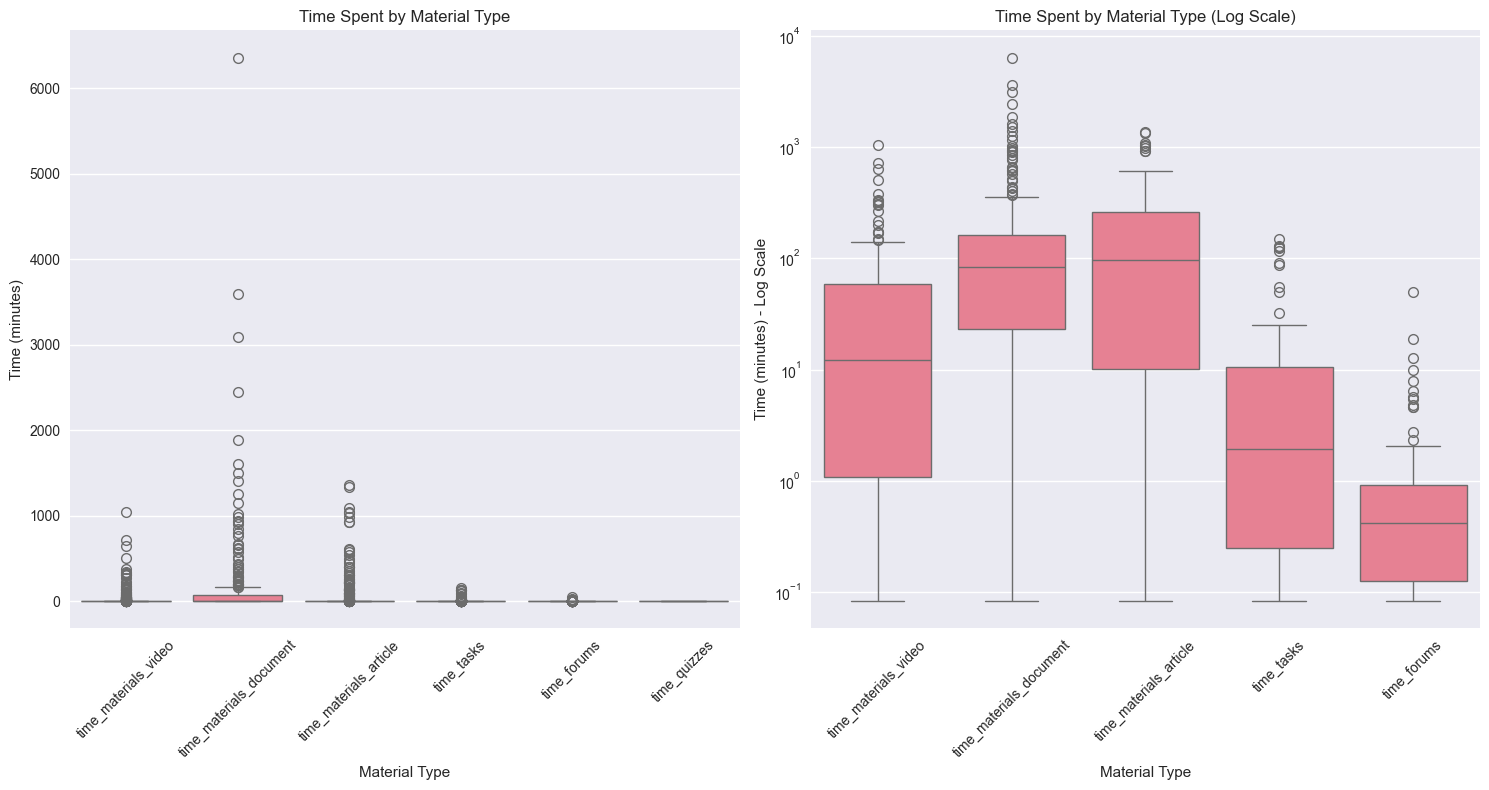

In [38]:
# Box plots for time spent by material type
plt.figure(figsize=(15, 8))

# Prepare data for box plot (log scale due to outliers)
time_melted = df_time[available_time_columns].melt(var_name='Material Type', value_name='Time (seconds)')
time_melted['Time (minutes)'] = time_melted['Time (seconds)'] / 60

plt.subplot(1, 2, 1)
sns.boxplot(data=time_melted, x='Material Type', y='Time (minutes)')
plt.title('Time Spent by Material Type')
plt.xlabel('Material Type')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)

# Log scale version
plt.subplot(1, 2, 2)
time_melted_log = time_melted[time_melted['Time (minutes)'] > 0]
sns.boxplot(data=time_melted_log, x='Material Type', y='Time (minutes)')
plt.yscale('log')
plt.title('Time Spent by Material Type (Log Scale)')
plt.xlabel('Material Type')
plt.ylabel('Time (minutes) - Log Scale')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(get_plot_output_path('time_boxplots.png'), dpi=300, bbox_inches='tight')
plt.show()

## 6. Data Integration and Merged Analysis

In [39]:
# Merge datasets
df_merged = pd.merge(
    df_styles[['NIM', 'Nama', 'Pemrosesan_Simplified', 'Input_Simplified']],
    df_time,
    left_on="NIM",
    right_on="NPM",
    how="inner"
)

print(f"Merged dataset shape: {df_merged.shape}")
print(f"Number of students with complete data: {len(df_merged)}")
print(f"Percentage of original learning styles data: {len(df_merged)/len(df_styles)*100:.1f}%")

print("\nMerged dataset columns:")
print(df_merged.columns.tolist())

print("\nFirst 5 rows of merged dataset:")
display(df_merged.head())

Merged dataset shape: (123, 12)
Number of students with complete data: 123
Percentage of original learning styles data: 20.4%

Merged dataset columns:
['NIM', 'Nama', 'Pemrosesan_Simplified', 'Input_Simplified', 'NPM', 'NAMA', 'time_materials_video', 'time_materials_document', 'time_materials_article', 'time_tasks', 'time_forums', 'time_quizzes']

First 5 rows of merged dataset:


,NIM,Nama,Pemrosesan_Simplified,Input_Simplified,NPM,NAMA,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
0,23SA21A011,Iwan Haryatno,Aktif,Visual,23SA21A011,IWAN HARYATNO,22551,5683,21321,7610,5,0
1,23SA11A045,Refida Septiana Putri,Reflektif,Verbal,23SA11A045,REFIDA SEPTIANA PUTRI,0,36562,0,0,0,0
2,22SA11A027,Wisnu Pratama aji,Reflektif,Visual,22SA11A027,WISNU PRATAMA AJI,0,0,0,0,0,0
3,22SA11A289,Mahmudi,Reflektif,Verbal,22SA11A289,MAHMUDI,0,14060,0,0,0,0
4,22SA11A097,Aditya Okta Saputra,Reflektif,Verbal,22SA11A097,ADITYA OKTA SAPUTRA,0,2071,0,0,0,0


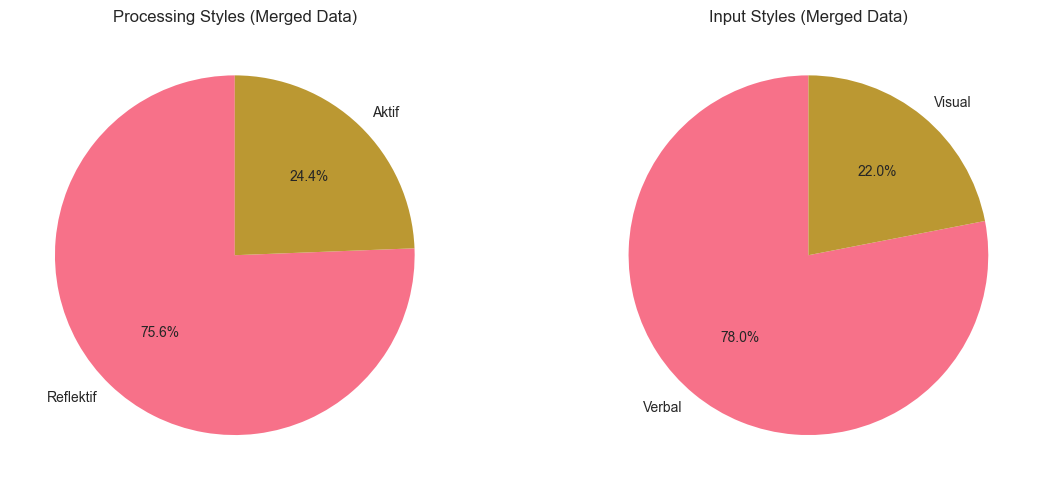

Learning Style Distribution in Merged Dataset:
Total students: 123

Processing Styles:
  Reflektif: 93 (75.6%)
  Aktif: 30 (24.4%)

Input Styles:
  Verbal: 96 (78.0%)
  Visual: 27 (22.0%)


In [40]:
# Check learning style distribution in merged dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Processing styles in merged data
processing_merged = df_merged['Pemrosesan_Simplified'].value_counts()
axes[0].pie(processing_merged.values, labels=processing_merged.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Processing Styles (Merged Data)')

# Input styles in merged data
input_merged = df_merged['Input_Simplified'].value_counts()
axes[1].pie(input_merged.values, labels=input_merged.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Input Styles (Merged Data)')

plt.tight_layout()
plt.savefig(get_plot_output_path('learning_styles_merged.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Learning Style Distribution in Merged Dataset:")
print(f"Total students: {len(df_merged)}")
print("\nProcessing Styles:")
for style, count in processing_merged.items():
    print(f"  {style}: {count} ({count/len(df_merged)*100:.1f}%)")

print("\nInput Styles:")
for style, count in input_merged.items():
    print(f"  {style}: {count} ({count/len(df_merged)*100:.1f}%)")

## 7. Correlation Analysis between Time Spent and Learning Styles

In [41]:
# Create features for analysis
feature_columns = [col for col in available_time_columns if col in df_merged.columns]
X_features = df_merged[feature_columns].fillna(0)

# Add total time spent
X_features['total_time'] = X_features.sum(axis=1)

print("Feature statistics:")
display(X_features.describe())

Feature statistics:


,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes,total_time
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.000000
mean,913.195122,7068.869919,350.211382,131.829268,0.284553,0.0,8464.390244
std,6292.281846,26017.586791,2707.285248,969.521656,1.952385,0.0,27485.515457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,5975.000000,0.000000,0.000000,0.000000,0.0,6539.000000
max,62535.000000,215322.000000,21321.000000,7610.000000,20.000000,0.0,215322.000000


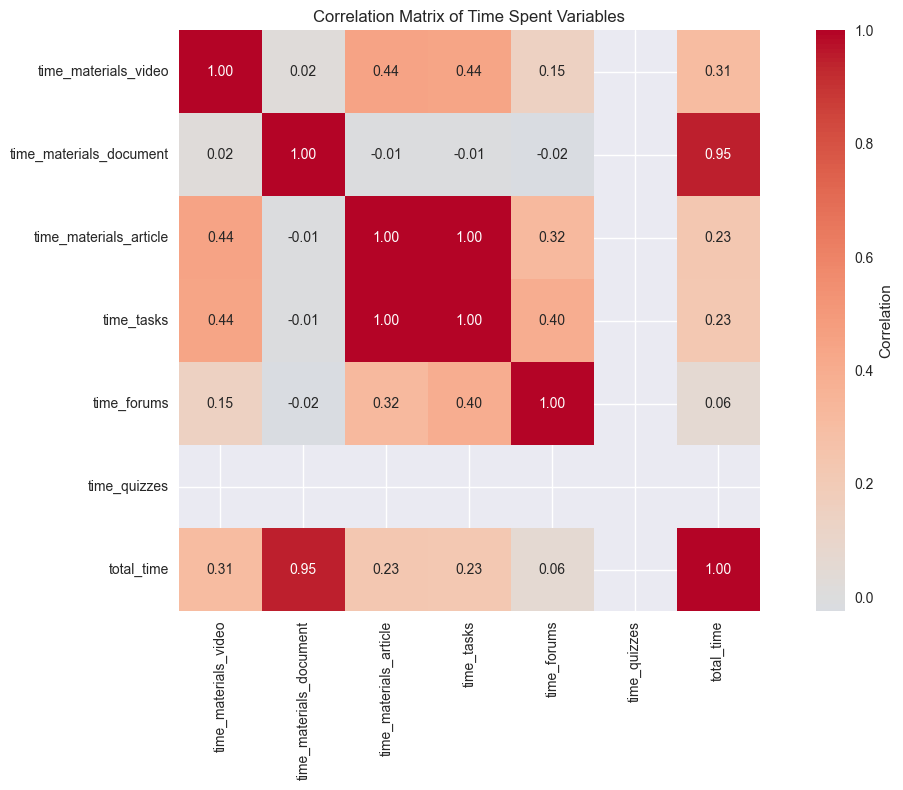

Strong correlations (|r| > 0.5):
  time_materials_document ↔ total_time: 0.950
  time_materials_article ↔ time_tasks: 0.997


In [42]:
# Correlation matrix
correlation_matrix = X_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Time Spent Variables')
plt.tight_layout()
plt.savefig(get_plot_output_path('correlation_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Strong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"  {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

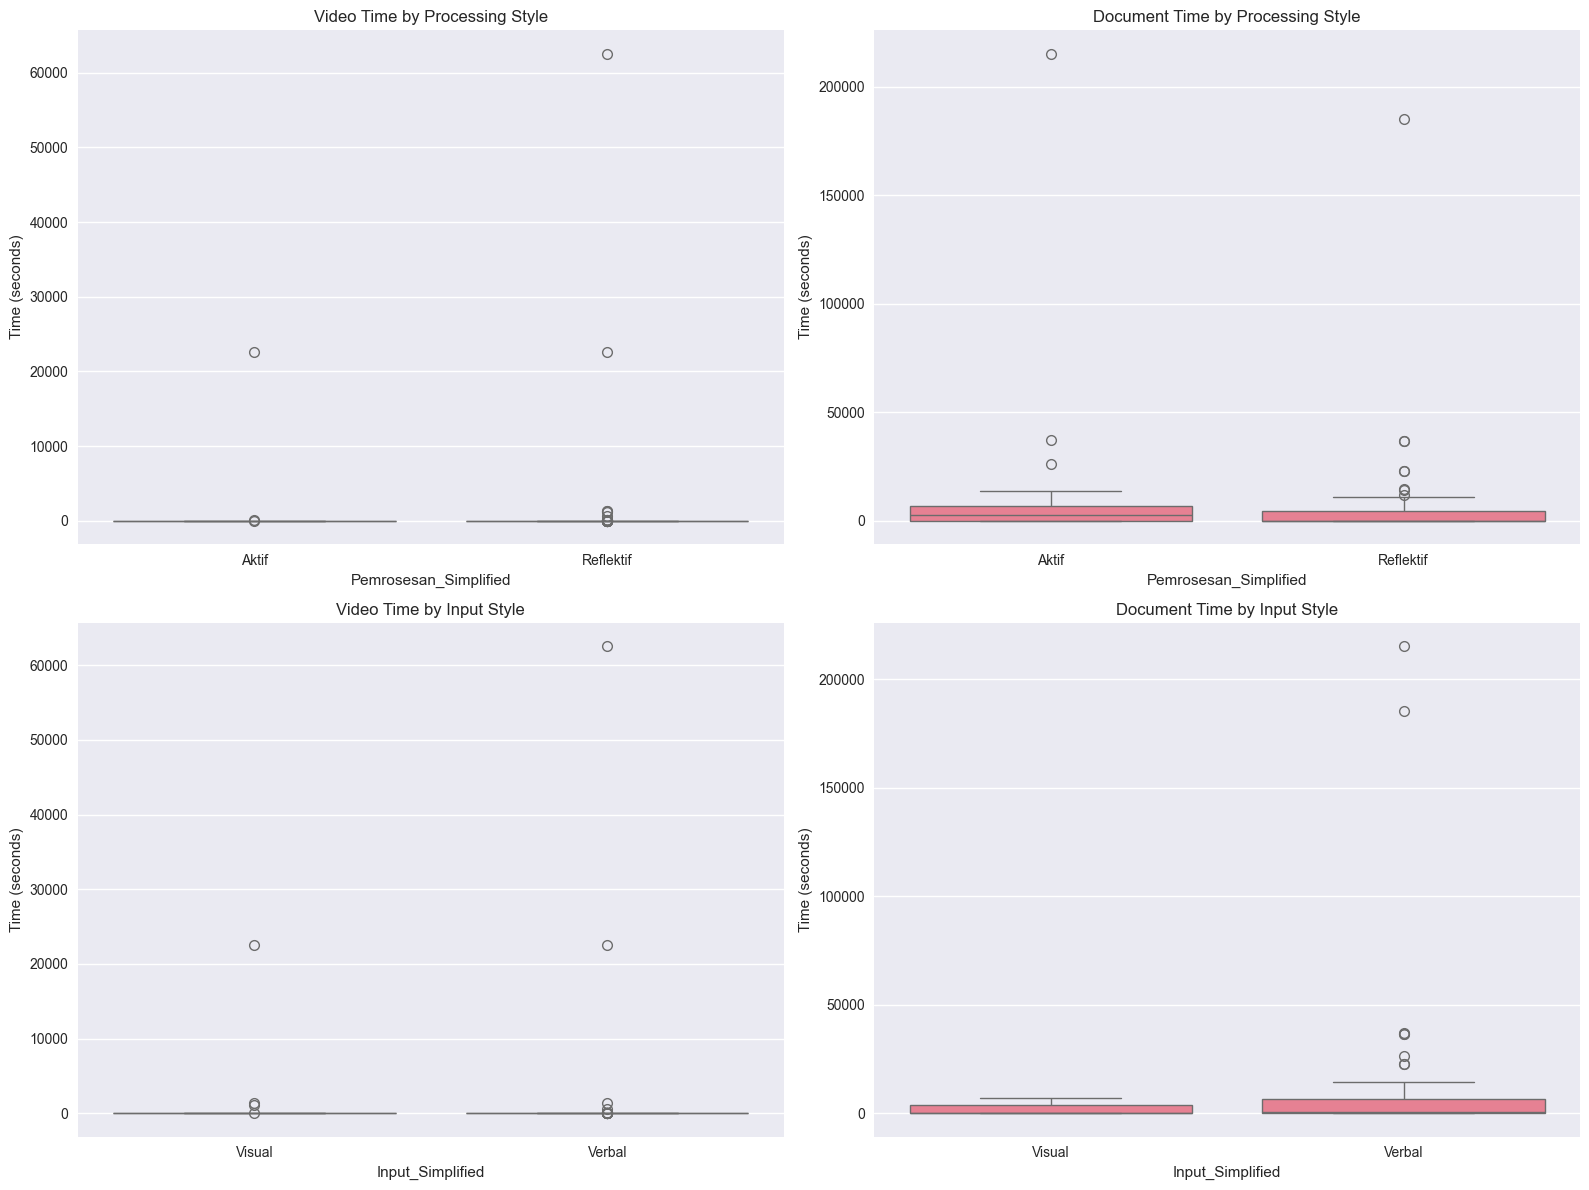

In [43]:
# Time spent by learning styles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Processing vs Video time
sns.boxplot(data=df_merged, x='Pemrosesan_Simplified', y='time_materials_video', ax=axes[0,0])
axes[0,0].set_title('Video Time by Processing Style')
axes[0,0].set_ylabel('Time (seconds)')

# Processing vs Document time
sns.boxplot(data=df_merged, x='Pemrosesan_Simplified', y='time_materials_document', ax=axes[0,1])
axes[0,1].set_title('Document Time by Processing Style')
axes[0,1].set_ylabel('Time (seconds)')

# Input vs Video time
sns.boxplot(data=df_merged, x='Input_Simplified', y='time_materials_video', ax=axes[1,0])
axes[1,0].set_title('Video Time by Input Style')
axes[1,0].set_ylabel('Time (seconds)')

# Input vs Document time
sns.boxplot(data=df_merged, x='Input_Simplified', y='time_materials_document', ax=axes[1,1])
axes[1,1].set_title('Document Time by Input Style')
axes[1,1].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.savefig(get_plot_output_path('time_by_learning_styles.png'), dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# Statistical analysis of time by learning styles
from scipy import stats

print("Statistical Analysis of Time Spent by Learning Styles:")
print("="*60)

# Processing styles comparison
for time_col in ['time_materials_video', 'time_materials_document', 'total_time']:
    if time_col in df_merged.columns:
        print(f"\n{time_col.replace('_', ' ').title()}:")
        
        # Split by processing style
        active_times = df_merged[df_merged['Pemrosesan_Simplified'] == 'Aktif'][time_col]
        reflective_times = df_merged[df_merged['Pemrosesan_Simplified'] == 'Reflektif'][time_col]
        
        if len(active_times) > 0 and len(reflective_times) > 0:
            print(f"  Active: Mean={active_times.mean():.1f}, Median={active_times.median():.1f}, Std={active_times.std():.1f}")
            print(f"  Reflective: Mean={reflective_times.mean():.1f}, Median={reflective_times.median():.1f}, Std={reflective_times.std():.1f}")
            
            # T-test
            t_stat, p_value = stats.ttest_ind(active_times, reflective_times)
            print(f"  T-test: t-stat={t_stat:.3f}, p-value={p_value:.3f} ({'Significant' if p_value < 0.05 else 'Not significant'})")

# Input styles comparison
for time_col in ['time_materials_video', 'time_materials_document', 'total_time']:
    if time_col in df_merged.columns:
        print(f"\n{time_col.replace('_', ' ').title()} (by Input Style):")
        
        # Split by input style
        visual_times = df_merged[df_merged['Input_Simplified'] == 'Visual'][time_col]
        verbal_times = df_merged[df_merged['Input_Simplified'] == 'Verbal'][time_col]
        
        if len(visual_times) > 0 and len(verbal_times) > 0:
            print(f"  Visual: Mean={visual_times.mean():.1f}, Median={visual_times.median():.1f}, Std={visual_times.std():.1f}")
            print(f"  Verbal: Mean={verbal_times.mean():.1f}, Median={verbal_times.median():.1f}, Std={verbal_times.std():.1f}")
            
            # T-test
            t_stat, p_value = stats.ttest_ind(visual_times, verbal_times)
            print(f"  T-test: t-stat={t_stat:.3f}, p-value={p_value:.3f} ({'Significant' if p_value < 0.05 else 'Not significant'})")

Statistical Analysis of Time Spent by Learning Styles:

Time Materials Video:
  Active: Mean=753.0, Median=0.0, Std=4117.0
  Reflective: Mean=964.9, Median=0.0, Std=6866.6
  T-test: t-stat=-0.160, p-value=0.873 (Not significant)

Time Materials Document:
  Active: Mean=12210.0, Median=2724.0, Std=39221.7
  Reflective: Mean=5410.5, Median=0.0, Std=20033.4
  T-test: t-stat=1.248, p-value=0.215 (Not significant)

Time Materials Video (by Input Style):
  Visual: Mean=926.6, Median=0.0, Std=4334.0
  Verbal: Mean=909.4, Median=0.0, Std=6760.5
  T-test: t-stat=0.012, p-value=0.990 (Not significant)

Time Materials Document (by Input Style):
  Visual: Mean=1851.0, Median=0.0, Std=2788.8
  Verbal: Mean=8536.4, Median=698.0, Std=29279.0
  T-test: t-stat=-1.181, p-value=0.240 (Not significant)


## 8. Multi-label Distribution Analysis

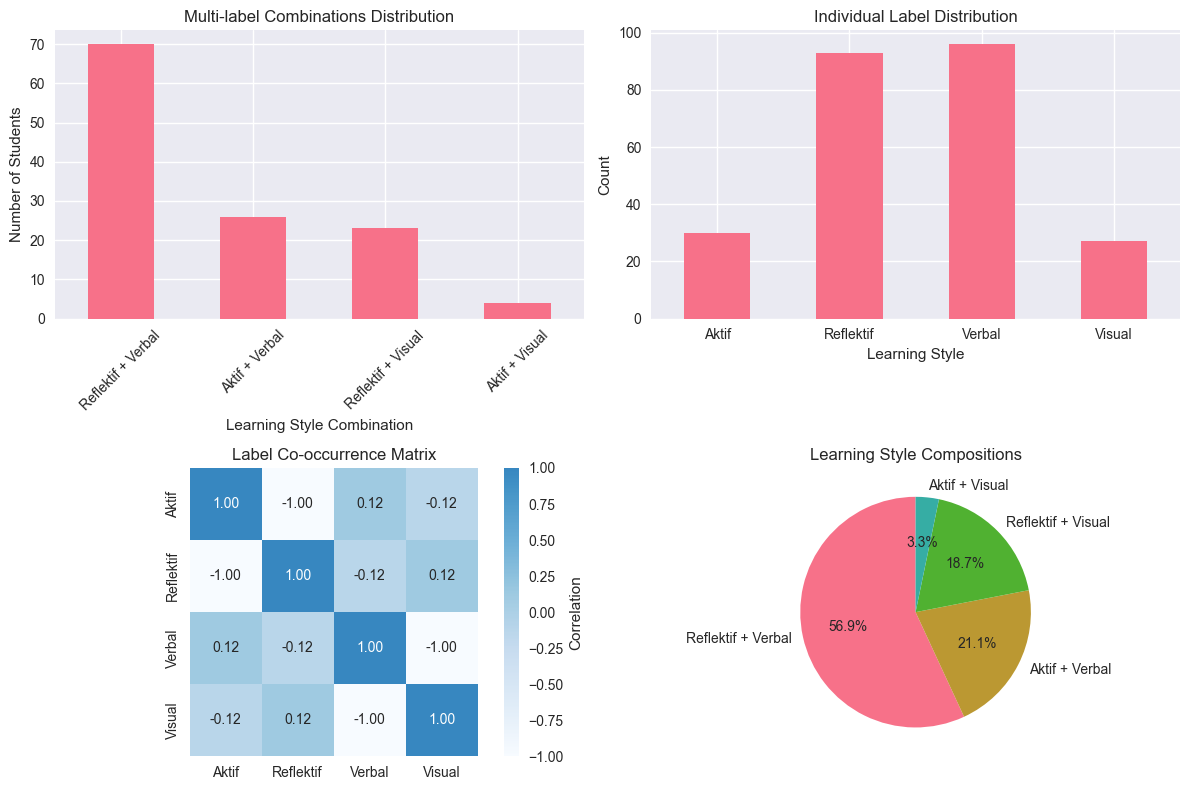

Multi-label Analysis:
Label classes: ['Aktif', 'Reflektif', 'Verbal', 'Visual']

Combination counts:
  Reflektif + Verbal: 70 (56.9%)
  Aktif + Verbal: 26 (21.1%)
  Reflektif + Visual: 23 (18.7%)
  Aktif + Visual: 4 (3.3%)


In [45]:
# Create multi-label combinations
df_merged['label_combination'] = df_merged['Pemrosesan_Simplified'] + ' + ' + df_merged['Input_Simplified']

# Analyze label combinations
label_combo_counts = df_merged['label_combination'].value_counts()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
label_combo_counts.plot(kind='bar')
plt.title('Multi-label Combinations Distribution')
plt.xlabel('Learning Style Combination')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# Create binary matrix for multi-label analysis
mlb = MultiLabelBinarizer()
labels_list = df_merged[['Pemrosesan_Simplified', 'Input_Simplified']].values.tolist()
y_binary = mlb.fit_transform(labels_list)

label_counts = pd.DataFrame(y_binary, columns=mlb.classes_).sum()

plt.subplot(2, 2, 2)
label_counts.plot(kind='bar')
plt.title('Individual Label Distribution')
plt.xlabel('Learning Style')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Co-occurrence heatmap
plt.subplot(2, 2, 3)
cooccurrence_matrix = pd.DataFrame(y_binary, columns=mlb.classes_).corr()
sns.heatmap(cooccurrence_matrix, annot=True, cmap='Blues', center=0.5, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Label Co-occurrence Matrix')

# Pie chart of combinations
plt.subplot(2, 2, 4)
plt.pie(label_combo_counts.values, labels=label_combo_counts.index, 
        autopct='%1.1f%%', startangle=90)
plt.title('Learning Style Compositions')

plt.tight_layout()
plt.savefig(get_plot_output_path('multilabel_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Multi-label Analysis:")
print(f"Label classes: {mlb.classes_.tolist()}")
print("\nCombination counts:")
for combo, count in label_combo_counts.items():
    print(f"  {combo}: {count} ({count/len(df_merged)*100:.1f}%)")

## 9. Feature Engineering and Selection

In [46]:
# Create additional features
df_features = df_merged.copy()

# Time-based features
time_cols = [col for col in feature_columns if col in df_merged.columns]
df_features['total_materials_time'] = df_features[[col for col in time_cols if 'materials' in col]].sum(axis=1)
df_features['total_interactive_time'] = df_features[[col for col in time_cols if any(x in col for x in ['tasks', 'forums', 'quizzes'])]].sum(axis=1)

# Calculate total_time
df_features['total_time'] = df_features[time_cols].sum(axis=1)

# Ratio features
df_features['video_to_document_ratio'] = np.where(
    df_features['time_materials_document'] > 0,
    df_features['time_materials_video'] / df_features['time_materials_document'],
    df_features['time_materials_video']
)

df_features['interactive_to_passive_ratio'] = np.where(
    df_features['total_materials_time'] > 0,
    df_features['total_interactive_time'] / df_features['total_materials_time'],
    df_features['total_interactive_time']
)

# Engagement level categorization
df_features['engagement_level'] = pd.cut(
    df_features['total_time'],
    bins=[-1, 0, 3600, 10800, float('inf')],  # 0, 1hr, 3hr+
    labels=['No Engagement', 'Low', 'Medium', 'High']
)

print("Engineered Features:")
engineered_features = ['total_materials_time', 'total_interactive_time', 
                       'video_to_document_ratio', 'interactive_to_passive_ratio']
display(df_features[engineered_features].describe())

Engineered Features:


,total_materials_time,total_interactive_time,video_to_document_ratio,interactive_to_passive_ratio
count,123.000000,123.000000,123.000000,123.000000
mean,8332.276423,132.113821,1.280434,0.007595
std,27282.442324,970.295926,12.063164,0.059520
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,6539.000000,0.000000,0.000000,0.000000
max,215322.000000,7615.000000,133.300000,0.626157


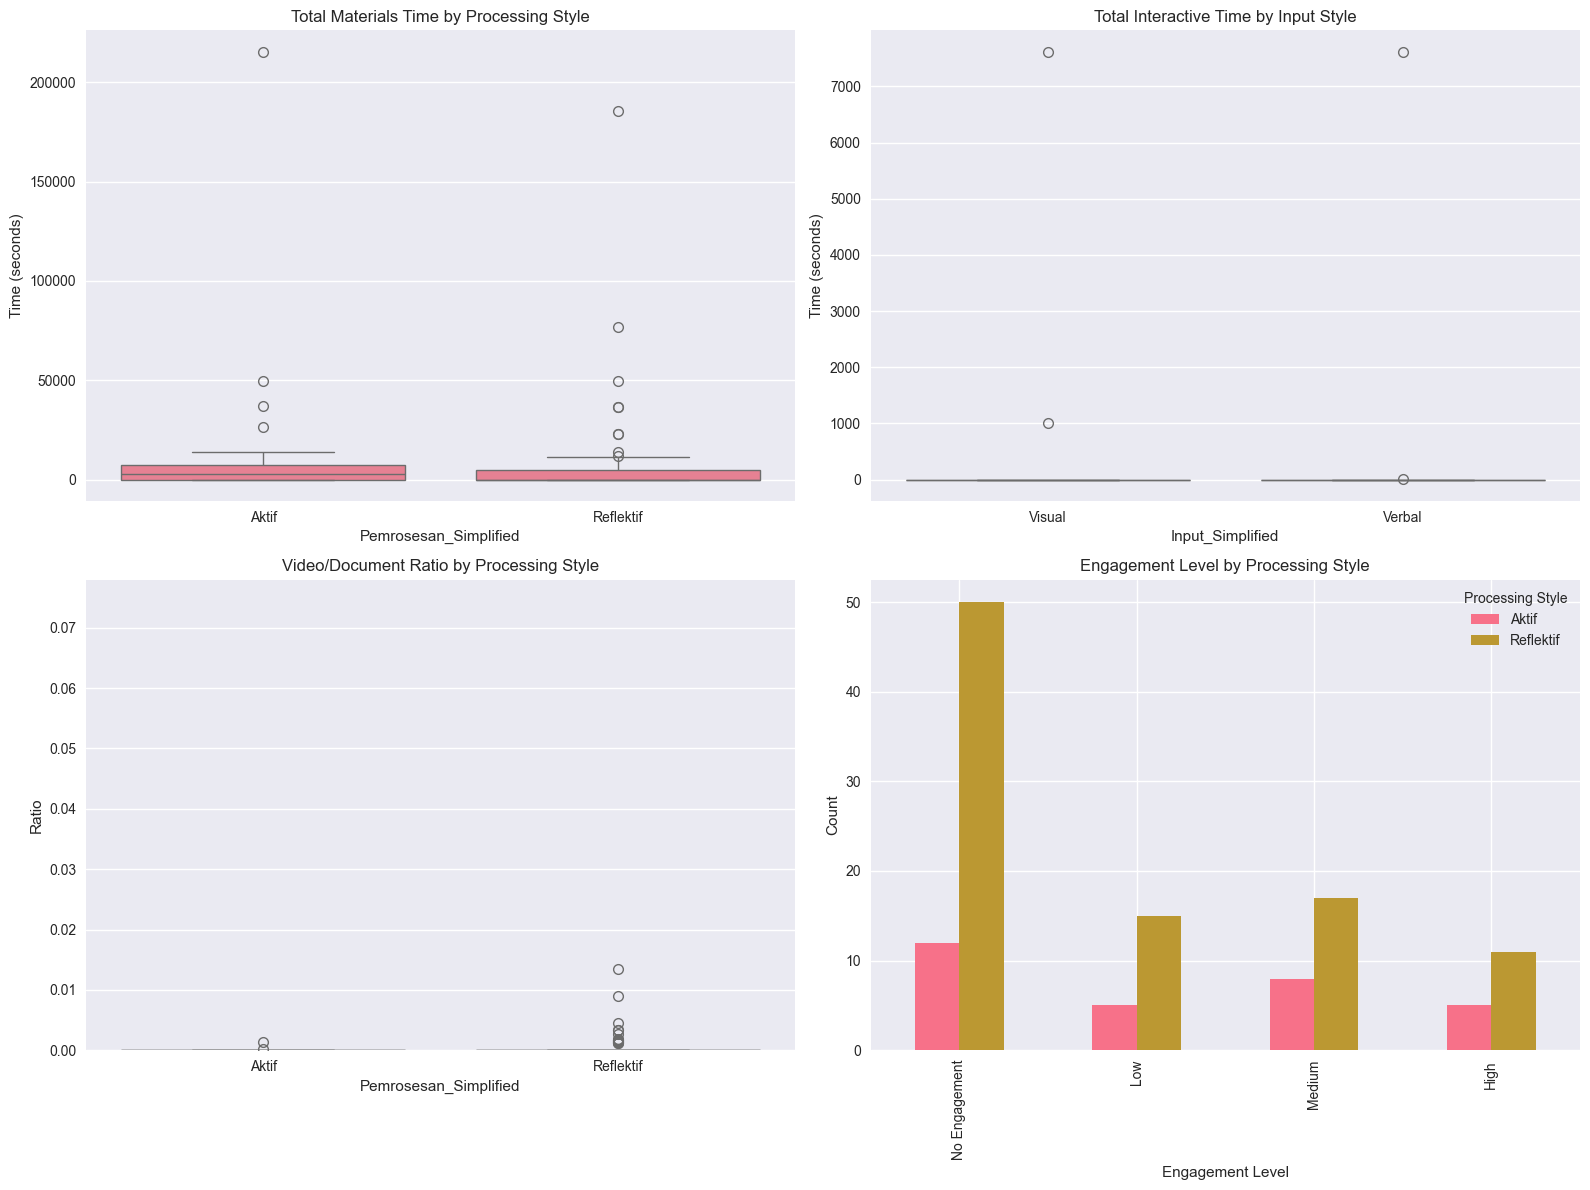

In [47]:
# Visualize engineered features by learning styles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total materials time by processing style
sns.boxplot(data=df_features, x='Pemrosesan_Simplified', y='total_materials_time', ax=axes[0,0])
axes[0,0].set_title('Total Materials Time by Processing Style')
axes[0,0].set_ylabel('Time (seconds)')

# Total interactive time by input style
sns.boxplot(data=df_features, x='Input_Simplified', y='total_interactive_time', ax=axes[0,1])
axes[0,1].set_title('Total Interactive Time by Input Style')
axes[0,1].set_ylabel('Time (seconds)')

# Video to document ratio by learning styles
sns.boxplot(data=df_features, x='Pemrosesan_Simplified', y='video_to_document_ratio', ax=axes[1,0])
axes[1,0].set_title('Video/Document Ratio by Processing Style')
axes[1,0].set_ylabel('Ratio')
axes[1,0].set_ylim(0, df_features['video_to_document_ratio'].quantile(0.95))  # Limit outliers

# Engagement level distribution
engagement_crosstab = pd.crosstab(df_features['engagement_level'], df_features['Pemrosesan_Simplified'])
engagement_crosstab.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Engagement Level by Processing Style')
axes[1,1].set_xlabel('Engagement Level')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Processing Style')

plt.tight_layout()
plt.savefig(get_plot_output_path('engineered_features_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

## 10. Summary and Key Insights

In [48]:
# Generate summary statistics
print("EDA SUMMARY REPORT")
print("="*50)

print("\n1. DATASET OVERVIEW:")
print(f"   - Learning styles dataset: {df_styles.shape[0]} students, {df_styles.shape[1]} features")
print(f"   - Time tracking dataset: {df_time.shape[0]} students, {df_time.shape[1]} features")
print(f"   - Successfully merged: {df_merged.shape[0]} students ({len(df_merged)/len(df_styles)*100:.1f}% match rate)")

print("\n2. STUDENT DEMOGRAPHICS:")
print(f"   - Gender distribution: {df_styles['Jenis Kelamin'].value_counts().to_dict()}")
print(f"   - Year distribution: {year_distribution.to_dict()}")
print(f"   - Program distribution: {len(df_styles['Prodi'].unique())} programs")

print("\n3. LEARNING STYLES DISTRIBUTION:")
for style_type in ['Pemrosesan_Simplified', 'Input_Simplified']:
    dist = df_merged[style_type].value_counts()
    print(f"   - {style_type.replace('_', ' ').title()}: {dist.to_dict()}")

print("\n4. TIME SPENT ANALYSIS:")
time_stats_summary = X_features.describe()
for col in ['time_materials_video', 'time_materials_document']:
    if col in time_stats_summary.columns:
        print(f"   - {col}: Mean={time_stats_summary.loc['mean', col]:.1f}s, Median={time_stats_summary.loc['50%', col]:.1f}s")

# Add total_time from df_features
if 'total_time' in df_features.columns:
    print(f"   - total_time: Mean={df_features['total_time'].mean():.1f}s, Median={df_features['total_time'].median():.1f}s")

print("\n5. ENGAGEMENT PATTERNS:")
if 'engagement_level' in df_features.columns:
    engagement_dist = df_features['engagement_level'].value_counts()
    for level, count in engagement_dist.items():
        print(f"   - {level} engagement: {count} students ({count/len(df_features)*100:.1f}%)")
else:
    print("   - Engagement levels not calculated")

print("\n6. KEY CORRELATIONS:")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_correlations.append(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if strong_correlations:
    for corr in strong_correlations:
        print(f"   - {corr}")
else:
    print("   - No strong correlations found (|r| > 0.5)")

print("\n7. MULTI-LABEL COMBINATIONS:")
for combo, count in label_combo_counts.items():
    print(f"   - {combo}: {count} students ({count/len(df_merged)*100:.1f}%)")

EDA SUMMARY REPORT

1. DATASET OVERVIEW:
   - Learning styles dataset: 604 students, 15 features
   - Time tracking dataset: 456 students, 8 features
   - Successfully merged: 123 students (20.4% match rate)

2. STUDENT DEMOGRAPHICS:
   - Gender distribution: {'Laki-laki': 390, 'Perempuan': 214}
   - Year distribution: {'-': 12, '1': 1, '1.': 1, '10': 2, '11': 3, '12': 2, '13': 1, '14': 1, '2': 2, '20': 4, '21': 15, '22': 150, '23': 252, '24': 146, '28': 1, '4': 1, '62': 1, '63': 1, '69': 1, '73': 1, 'SI': 1, '_': 1, 'd': 1, 'te': 1, 'y': 1, '~': 1}
   - Program distribution: 5 programs

3. LEARNING STYLES DISTRIBUTION:
   - Pemrosesan Simplified: {'Reflektif': 93, 'Aktif': 30}
   - Input Simplified: {'Verbal': 96, 'Visual': 27}

4. TIME SPENT ANALYSIS:
   - time_materials_video: Mean=913.2s, Median=0.0s
   - time_materials_document: Mean=7068.9s, Median=0.0s
   - total_time: Mean=8464.4s, Median=0.0s

5. ENGAGEMENT PATTERNS:
   - No Engagement engagement: 62 students (50.4%)
   - Medi

In [49]:
# Prepare base dataset for three imputation strategies
print("="*70)
print("CREATING THREE DATASETS WITH DIFFERENT IMPUTATION STRATEGIES")
print("="*70)

# Get feature columns (time-based features only)
final_features = ['NIM', 'Pemrosesan_Simplified', 'Input_Simplified'] + feature_columns

# Create base dataframe from merged dataset
df_base = df_merged[final_features].copy()

print(f"\nBase dataset shape: {df_base.shape}")
print(f"Features to be imputed: {feature_columns}")

# ---------------------------------------------------------
# CHECK MISSING AND ZERO VALUES
# ---------------------------------------------------------
print("\n" + "-"*30)
print("DATA QUALITY CHECK (Null & Zeros)")
print("-"*30)
missing_info = df_base[feature_columns].isnull().sum()
zero_info = (df_base[feature_columns] == 0).sum()

print(f"{'Column':<30} | {'NaN Count':<10} | {'Zero (0) Count':<15} | {'Total Invalid':<15}")
print("-" * 80)
for col in feature_columns:
    n_nan = missing_info[col]
    n_zero = zero_info[col]
    total_inv = n_nan + n_zero
    print(f"{col:<30} | {n_nan:<10} | {n_zero:<15} | {total_inv:<15}")


# Strategy 1: Zero Imputation (fillna with 0)
# Note: Disini kita tidak mengubah 0, karena strateginya memang mengisi kekosongan dengan 0.
print("\n" + "="*70)
print("STRATEGY 1: ZERO IMPUTATION")
print("="*70)
df_zero = df_base.copy()
df_zero[feature_columns] = df_zero[feature_columns].fillna(0)

print(f"Dataset shape: {df_zero.shape}")
print(f"Missing values after imputation: {df_zero[feature_columns].isnull().sum().sum()}")
print("\nDescriptive statistics (time features):")
display(df_zero[feature_columns].describe())


# Strategy 2: Mean Imputation (Handle 0 as NaN)
print("\n" + "="*70)
print("STRATEGY 2: MEAN IMPUTATION (TREATING 0 AS MISSING)")
print("="*70)
df_mean = df_base.copy()

# LANGKAH PENTING: Ubah 0 menjadi NaN terlebih dahulu
# Agar mean dihitung berdasarkan data yang benar-benar ada isinya (tidak bias ke 0)
df_mean[feature_columns] = df_mean[feature_columns].replace(0, np.nan)

# Calculate means for each feature column (Pandas automatic skip NaNs)
means = df_mean[feature_columns].mean()
print("\nMean values for imputation (calculated from non-zero values):")
for col, mean_val in means.items():
    print(f"  {col}: {mean_val:.2f} seconds ({mean_val/60:.2f} minutes)")

# Impute NaN (which now includes original NaNs AND original 0s) with mean
df_mean[feature_columns] = df_mean[feature_columns].fillna(means)

print(f"\nDataset shape: {df_mean.shape}")
# Verifikasi apakah masih ada NaN (seharusnya 0)
print(f"Missing values after imputation: {df_mean[feature_columns].isnull().sum().sum()}")
# Verifikasi apakah masih ada 0 (seharusnya 0, kecuali hasil mean kebetulan 0)
print(f"Zero values after imputation   : {(df_mean[feature_columns] == 0).sum().sum()}")
print("\nDescriptive statistics (time features):")
display(df_mean[feature_columns].describe())


# Strategy 3: Median Imputation (Handle 0 as NaN)
print("\n" + "="*70)
print("STRATEGY 3: MEDIAN IMPUTATION (TREATING 0 AS MISSING)")
print("="*70)
df_median = df_base.copy()

# LANGKAH PENTING: Ubah 0 menjadi NaN terlebih dahulu
df_median[feature_columns] = df_median[feature_columns].replace(0, np.nan)

# Calculate medians for each feature column
medians = df_median[feature_columns].median()
print("\nMedian values for imputation (calculated from non-zero values):")
for col, median_val in medians.items():
    print(f"  {col}: {median_val:.2f} seconds ({median_val/60:.2f} minutes)")

# Impute with median
df_median[feature_columns] = df_median[feature_columns].fillna(medians)

print(f"\nDataset shape: {df_median.shape}")
print(f"Missing values after imputation: {df_median[feature_columns].isnull().sum().sum()}")
print(f"Zero values after imputation   : {(df_median[feature_columns] == 0).sum().sum()}")
print("\nDescriptive statistics (time features):")
display(df_median[feature_columns].describe())

print("\n" + "="*70)
print("SUMMARY: Three datasets created successfully")
print("="*70)

CREATING THREE DATASETS WITH DIFFERENT IMPUTATION STRATEGIES

Base dataset shape: (123, 9)
Features to be imputed: ['time_materials_video', 'time_materials_document', 'time_materials_article', 'time_tasks', 'time_forums', 'time_quizzes']

------------------------------
DATA QUALITY CHECK (Null & Zeros)
------------------------------
Column                         | NaN Count  | Zero (0) Count  | Total Invalid  
--------------------------------------------------------------------------------
time_materials_video           | 0          | 99              | 99             
time_materials_document        | 0          | 62              | 62             
time_materials_article         | 0          | 119             | 119            
time_tasks                     | 0          | 120             | 120            
time_forums                    | 0          | 119             | 119            
time_quizzes                   | 0          | 123             | 123            

STRATEGY 1: ZERO IMPUTA

,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.0
mean,913.195122,7068.869919,350.211382,131.829268,0.284553,0.0
std,6292.281846,26017.586791,2707.285248,969.521656,1.952385,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,5975.000000,0.000000,0.000000,0.000000,0.0
max,62535.000000,215322.000000,21321.000000,7610.000000,20.000000,0.0



STRATEGY 2: MEAN IMPUTATION (TREATING 0 AS MISSING)

Mean values for imputation (calculated from non-zero values):
  time_materials_video: 4680.12 seconds (78.00 minutes)
  time_materials_document: 14253.62 seconds (237.56 minutes)
  time_materials_article: 10769.00 seconds (179.48 minutes)
  time_tasks: 5405.00 seconds (90.08 minutes)
  time_forums: 8.75 seconds (0.15 minutes)
  time_quizzes: nan seconds (nan minutes)

Dataset shape: (123, 9)
Missing values after imputation: 123
Zero values after imputation   : 0

Descriptive statistics (time features):


,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
count,123.000000,123.000000,123.000000,123.000000,123.000000,0.0
mean,4680.125000,14253.622951,10769.000000,5405.000000,8.750000,NaN
std,6010.380404,25014.204806,1910.682347,488.994871,1.176094,NaN
min,5.000000,10.000000,156.000000,995.000000,5.000000,NaN
25%,4680.125000,6357.000000,10769.000000,5405.000000,8.750000,NaN
50%,4680.125000,14253.622951,10769.000000,5405.000000,8.750000,NaN
75%,4680.125000,14253.622951,10769.000000,5405.000000,8.750000,NaN
max,62535.000000,215322.000000,21321.000000,7610.000000,20.000000,NaN



STRATEGY 3: MEDIAN IMPUTATION (TREATING 0 AS MISSING)

Median values for imputation (calculated from non-zero values):
  time_materials_video: 27.50 seconds (0.46 minutes)
  time_materials_document: 6267.00 seconds (104.45 minutes)
  time_materials_article: 10799.50 seconds (179.99 minutes)
  time_tasks: 7610.00 seconds (126.83 minutes)
  time_forums: 5.00 seconds (0.08 minutes)
  time_quizzes: nan seconds (nan minutes)

Dataset shape: (123, 9)
Missing values after imputation: 123
Zero values after imputation   : 0

Descriptive statistics (time features):


,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
count,123.000000,123.000000,123.000000,123.000000,123.000000,0.0
mean,935.329268,10227.845528,10798.508130,7556.219512,5.121951,NaN
std,6289.051886,25333.507953,1910.690069,596.454463,1.352504,NaN
min,5.000000,10.000000,156.000000,995.000000,5.000000,NaN
25%,27.500000,6267.000000,10799.500000,7610.000000,5.000000,NaN
50%,27.500000,6267.000000,10799.500000,7610.000000,5.000000,NaN
75%,27.500000,6267.000000,10799.500000,7610.000000,5.000000,NaN
max,62535.000000,215322.000000,21321.000000,7610.000000,20.000000,NaN



SUMMARY: Three datasets created successfully


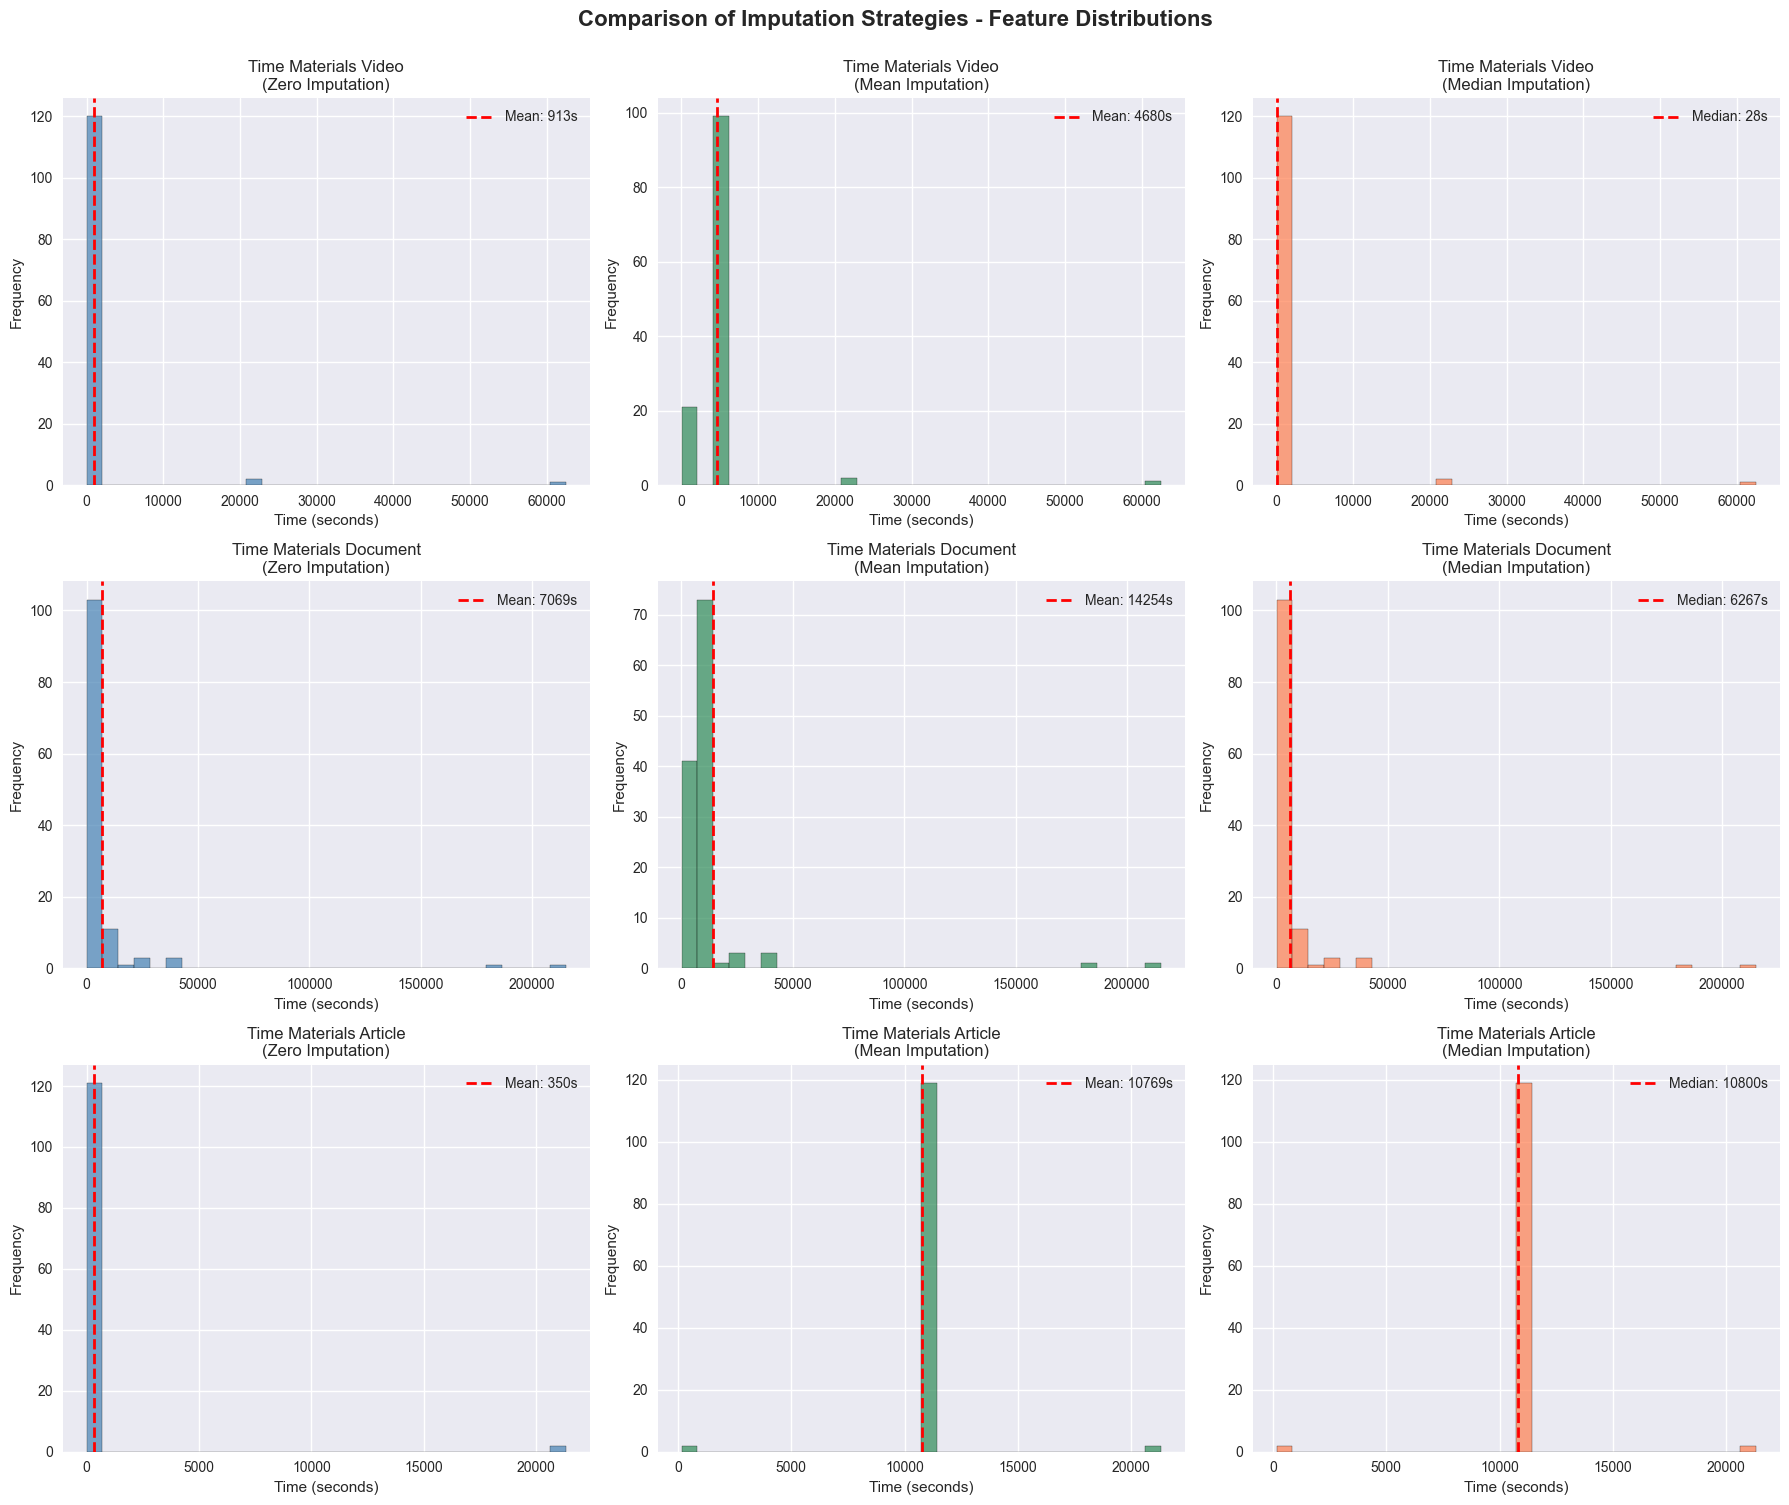

Visualization saved: imputation_strategies_comparison.png


In [50]:
# Visualize comparison of three imputation strategies
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Select key time features for visualization
viz_features = ['time_materials_video', 'time_materials_document', 'time_materials_article']

for idx, feature in enumerate(viz_features):
    if feature in feature_columns:
        # Zero imputation
        axes[idx, 0].hist(df_zero[feature], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
        axes[idx, 0].set_title(f'{feature.replace("_", " ").title()}\n(Zero Imputation)')
        axes[idx, 0].set_xlabel('Time (seconds)')
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].axvline(df_zero[feature].mean(), color='red', linestyle='--', 
                             linewidth=2, label=f'Mean: {df_zero[feature].mean():.0f}s')
        axes[idx, 0].legend()
        
        # Mean imputation
        axes[idx, 1].hist(df_mean[feature], bins=30, alpha=0.7, edgecolor='black', color='seagreen')
        axes[idx, 1].set_title(f'{feature.replace("_", " ").title()}\n(Mean Imputation)')
        axes[idx, 1].set_xlabel('Time (seconds)')
        axes[idx, 1].set_ylabel('Frequency')
        axes[idx, 1].axvline(df_mean[feature].mean(), color='red', linestyle='--', 
                             linewidth=2, label=f'Mean: {df_mean[feature].mean():.0f}s')
        axes[idx, 1].legend()
        
        # Median imputation
        axes[idx, 2].hist(df_median[feature], bins=30, alpha=0.7, edgecolor='black', color='coral')
        axes[idx, 2].set_title(f'{feature.replace("_", " ").title()}\n(Median Imputation)')
        axes[idx, 2].set_xlabel('Time (seconds)')
        axes[idx, 2].set_ylabel('Frequency')
        axes[idx, 2].axvline(df_median[feature].median(), color='red', linestyle='--', 
                             linewidth=2, label=f'Median: {df_median[feature].median():.0f}s')
        axes[idx, 2].legend()

plt.suptitle('Comparison of Imputation Strategies - Feature Distributions', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(get_plot_output_path('imputation_strategies_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved: imputation_strategies_comparison.png")

In [52]:
# Statistical comparison of three imputation strategies
print("="*70)
print("STATISTICAL COMPARISON OF IMPUTATION STRATEGIES")
print("="*70)

comparison_data = []

for feature in feature_columns:
    if feature in df_zero.columns:
        comparison_data.append({
            'Feature': feature,
            'Zero_Mean': df_zero[feature].mean(),
            'Zero_Std': df_zero[feature].std(),
            'Zero_Median': df_zero[feature].median(),
            'Mean_Mean': df_mean[feature].mean(),
            'Mean_Std': df_mean[feature].std(),
            'Mean_Median': df_mean[feature].median(),
            'Median_Mean': df_median[feature].mean(),
            'Median_Std': df_median[feature].std(),
            'Median_Median': df_median[feature].median(),
        })

comparison_df = pd.DataFrame(comparison_data)
print("\nComparative Statistics:")
display(comparison_df)

# Save comparison statistics
comparison_df.to_csv(get_report_output_path("imputation_strategies_comparison.csv", "classification_results"), index=False)
print(f"\nComparison saved to: {get_report_output_path('imputation_strategies_comparison.csv', 'classification_results')}")

STATISTICAL COMPARISON OF IMPUTATION STRATEGIES

Comparative Statistics:


,Feature,Zero_Mean,Zero_Std,Zero_Median,Mean_Mean,Mean_Std,Mean_Median,Median_Mean,Median_Std,Median_Median
0,time_materials_video,913.195122,6292.281846,0.0,4680.125000,6010.380404,4680.125000,935.329268,6289.051886,27.5
1,time_materials_document,7068.869919,26017.586791,0.0,14253.622951,25014.204806,14253.622951,10227.845528,25333.507953,6267.0
2,time_materials_article,350.211382,2707.285248,0.0,10769.000000,1910.682347,10769.000000,10798.508130,1910.690069,10799.5
3,time_tasks,131.829268,969.521656,0.0,5405.000000,488.994871,5405.000000,7556.219512,596.454463,7610.0
4,time_forums,0.284553,1.952385,0.0,8.750000,1.176094,8.750000,5.121951,1.352504,5.0
5,time_quizzes,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN



Comparison saved to: outputs/reports/classification_results/imputation_strategies_comparison.csv


In [51]:
# Save all three cleaned datasets for modeling
print("="*70)
print("SAVING THREE DATASETS WITH DIFFERENT IMPUTATION STRATEGIES")
print("="*70)

# Save Strategy 1: Zero Imputation
output_zero = get_data_output_path("cleaned_learning_styles_dataset_zero.csv", "processed")
df_zero.to_csv(output_zero, index=False)
print(f"\n✅ Strategy 1 (Zero Imputation) saved to:")
print(f"   {output_zero}")
print(f"   Shape: {df_zero.shape}, Features: {len(feature_columns)}")

# Save Strategy 2: Mean Imputation
output_mean = get_data_output_path("cleaned_learning_styles_dataset_mean.csv", "processed")
df_mean.to_csv(output_mean, index=False)
print(f"\n✅ Strategy 2 (Mean Imputation) saved to:")
print(f"   {output_mean}")
print(f"   Shape: {df_mean.shape}, Features: {len(feature_columns)}")

# Save Strategy 3: Median Imputation
output_median = get_data_output_path("cleaned_learning_styles_dataset_median.csv", "processed")
df_median.to_csv(output_median, index=False)
print(f"\n✅ Strategy 3 (Median Imputation) saved to:")
print(f"   {output_median}")
print(f"   Shape: {df_median.shape}, Features: {len(feature_columns)}")

# Also save the original (for backward compatibility)
output_original = get_data_output_path("cleaned_learning_styles_dataset.csv", "processed")
df_zero.to_csv(output_original, index=False)
print(f"\n✅ Default dataset (Zero Imputation) saved to:")
print(f"   {output_original}")
print(f"   (Backward compatibility - same as Strategy 1)")

# Save EDA summary with imputation info
eda_summary = {
    'dataset_info': {
        'total_students_original': len(df_styles),
        'total_students_with_time_data': len(df_merged),
        'match_rate': len(df_merged)/len(df_styles),
        'features_available': len(feature_columns)
    },
    'imputation_strategies': {
        'strategy_1_zero': {
            'description': 'Fill missing values with 0 (no engagement)',
            'output_file': 'cleaned_learning_styles_dataset_zero.csv',
            'samples': len(df_zero)
        },
        'strategy_2_mean': {
            'description': 'Fill missing values with column mean',
            'output_file': 'cleaned_learning_styles_dataset_mean.csv',
            'samples': len(df_mean),
            'mean_values': means.to_dict()
        },
        'strategy_3_median': {
            'description': 'Fill missing values with column median',
            'output_file': 'cleaned_learning_styles_dataset_median.csv',
            'samples': len(df_median),
            'median_values': medians.to_dict()
        }
    },
    'learning_styles_distribution': {
        'processing_styles': processing_merged.to_dict(),
        'input_styles': input_merged.to_dict()
    },
    'time_statistics': X_features.describe().to_dict(),
    'label_combinations': label_combo_counts.to_dict()
}

import json
with open(get_report_output_path("eda_summary.json", "classification_results"), 'w') as f:
    json.dump(eda_summary, f, indent=2, default=str)

print(f"\n✅ EDA summary (with imputation info) saved to:")
print(f"   {get_report_output_path('eda_summary.json', 'classification_results')}")

print("\n" + "="*70)
print("DATASET CREATION COMPLETE")
print("="*70)
print("\nNext steps:")
print("1. Use these three datasets in oversampling comparison notebook")
print("2. Compare model performance across different imputation strategies")
print("3. Identify which strategy works best for your use case")
print("\nTotal plots generated: Check the", get_plot_output_path(''), "directory")

SAVING THREE DATASETS WITH DIFFERENT IMPUTATION STRATEGIES

✅ Strategy 1 (Zero Imputation) saved to:
   outputs/data/processed/cleaned_learning_styles_dataset_zero.csv
   Shape: (123, 9), Features: 6

✅ Strategy 2 (Mean Imputation) saved to:
   outputs/data/processed/cleaned_learning_styles_dataset_mean.csv
   Shape: (123, 9), Features: 6

✅ Strategy 3 (Median Imputation) saved to:
   outputs/data/processed/cleaned_learning_styles_dataset_median.csv
   Shape: (123, 9), Features: 6

✅ Default dataset (Zero Imputation) saved to:
   outputs/data/processed/cleaned_learning_styles_dataset.csv
   (Backward compatibility - same as Strategy 1)

✅ EDA summary (with imputation info) saved to:
   outputs/reports/classification_results/eda_summary.json

DATASET CREATION COMPLETE

Next steps:
1. Use these three datasets in oversampling comparison notebook
2. Compare model performance across different imputation strategies
3. Identify which strategy works best for your use case

Total plots generate

## 11. Multiple Missing Value Imputation Strategies

We will create three versions of the cleaned dataset with different imputation strategies:
1. **Zero Imputation**: Fill missing values with 0 (no engagement)
2. **Mean Imputation**: Fill missing values with column mean
3. **Median Imputation**: Fill missing values with column median

This allows us to compare the impact of different imputation strategies on model performance.

## 11. Recommendations for Modeling

Based on the EDA analysis, here are key recommendations for the modeling phase:

### Data Preparation:
1. **Feature Selection**: Focus on time-based features showing variation across learning styles
2. **Outlier Handling**: Consider log transformation for time variables due to right-skewed distributions
3. **Missing Values**: The merged dataset has complete data for 123 students with time tracking

### Modeling Approach:
1. **Multi-label Classification**: Use MultiOutputClassifier with appropriate base estimators
2. **Class Imbalance**: Address imbalance in learning style distributions (consider SMOTE or class weights)
3. **Feature Engineering**: Include ratio features and engagement categorization

### Evaluation Strategy:
1. **Multi-label Metrics**: Use precision, recall, F1-score for each label
2. **Cross-validation**: Ensure robust evaluation given the relatively small dataset
3. **Confusion Analysis**: Analyze confusion patterns for each learning style dimension

### Business Insights:
1. **Personalized Learning**: Time spent patterns vary by learning styles
2. **Content Optimization**: Video vs document preferences can inform content delivery
3. **Engagement Strategies**: Different engagement levels correlate with learning style combinations